In [ ]:
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)


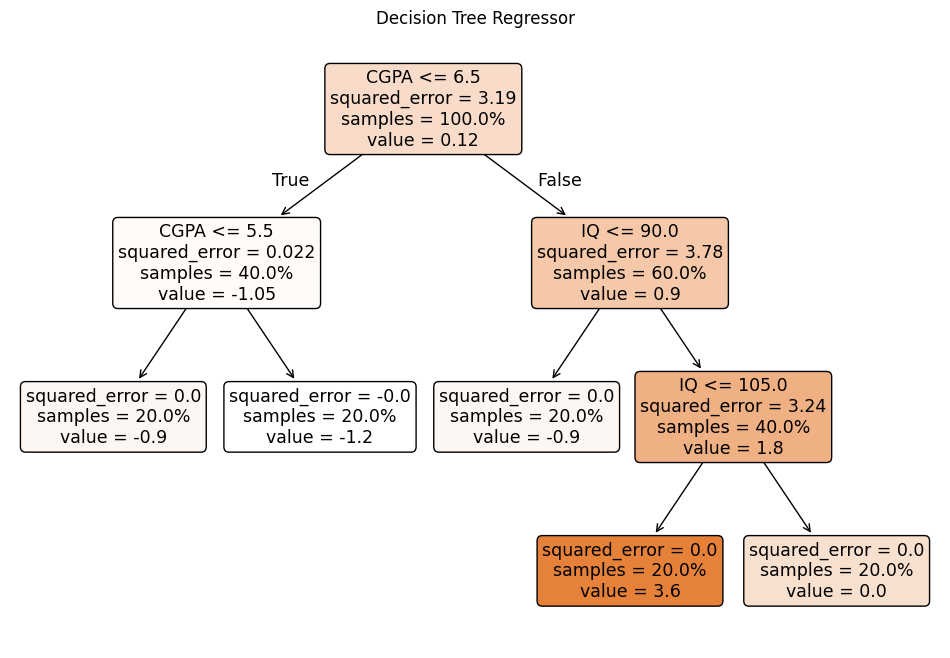

In [ ]:
# prompt: import decision tree regressor and plot tree and all the necessary librarires

import numpy as np
!pip install scikit-learn matplotlib

from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Example Usage (assuming you have X and y data)
# X = your features (numpy array or pandas DataFrame)
# y = your target variable (numpy array or pandas Series)

# For demonstration, let's create some sample data
X = np.array([[110,8], [80,7], [100,7], [70,6], [120,5]])
y = np.array([0, -0.9, 3.6, -1.2, -0.9])

# Create and fit the Decision Tree Regressor model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, rounded=True, feature_names=['IQ','CGPA'], proportion=True)
plt.title("Decision Tree Regressor")
plt.show()
